In [1]:
import matplotlib.pyplot as plt
import numpy as np


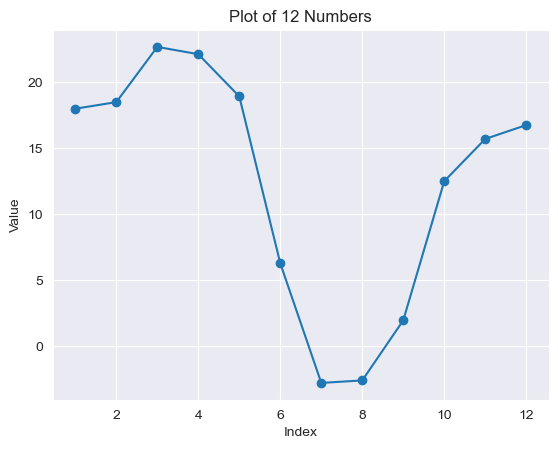

In [2]:
# Read numbers from file
file_name = "evap_Sennar.txt"  # Replace "numbers.txt" with your file name
with open(file_name, "r") as file:
    temps = [float(line.strip()) for line in file.readlines()[:12]]  # Read the first 12 lines and convert them to float

# Plot the numbers
plt.plot(range(1, 13), temps, marker='o', linestyle='-')
plt.title('Plot of 12 Numbers')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [3]:
def generate_year_evaps(temps, years, evap_increase_coef, lambda_mean, lambda_std):    
    temps_years = []
    for i in range(years):
        constant_value = ((1 + evap_increase_coef) ** (6 + i)) - 1
        T = temps + np.abs(np.array(temps) * constant_value)
        T_min = T.min()
        T_max = T.max()
        T_norm = (T - T_min) / (T_max - T_min)
        lambda_val = np.random.normal(lambda_mean, lambda_std)
        # Apply log transformation
        # Using a small value for lambda to avoid large distortions
        T_log = np.log(1 + lambda_val * T_norm)
        
        # Scale and shift back to the original range
        T_scaled = T_log * (T_max - T_min) / np.log(1 + lambda_val) + T_min
        
        # Adjust mean to match the original data
        original_mean = T.mean()
        scaled_mean = T_scaled.mean()
        T_final = T_scaled + (original_mean - scaled_mean)
        
        temps_years = np.append(temps_years, T_final)
    
    return temps_years

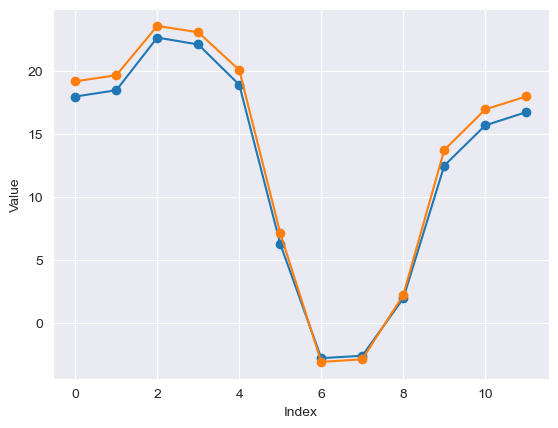

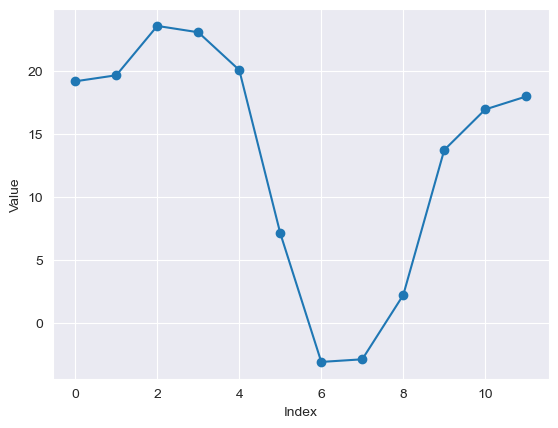

In [5]:
newtemps = generate_year_evaps(temps, 1, 0.01, 0.5, 0.5)
plt.plot(range(0, 12), temps, newtemps, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()

plt.plot(newtemps, marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('Value')
plt.grid(True)
plt.show()